# East African News Classification

## Business Understanding

### Business Overview

> The "East African News Classification" dataset presents an opportunity for news organizations in the region to automate and improve the accuracy of news categorization. Analyzing the dataset enables identification of emerging trends and provides valuable insights into East African news.


### Business Problem

* News outlets have been grappling with the time-consuming and error-prone manual process of categorizing news articles from East African nations. This inefficient approach hinders their ability to track media streams, understand cultural influences on press reporting, and provide tailored insights. 
* By implementing a machine learning text classification model, the news outlet can automate and improve the accuracy of categorization, enabling them to efficiently track information flows, identify emerging trends, and gain valuable insights into how culture shapes press reporting in the region. 
* This investment in a robust text classification model would streamline operations, ensure consistency, and enhance their reporting capabilities, ultimately allowing them to better serve their audience and remain competitive.


## Data Understanding

* For this project, we analysed an East African News Classification dataset which has 23268 rows 3 columns.
* The three columns are {text}, {label} and {category}
* We chose this Dataset because it offers critical insights into media streams across East Africa, allowing for tailored insights related to racial tensions and social shifts.




## Objectives

### General Objectives

 - Ensure consistency and accuracy in news categorization.
 - Streamline the news outlet's operations by implementing a robust text classification model.
 - Improve the ability to track information flows in East African media streams.
 - Provide valuable insights into the impact of cultural factors on press reporting.
 - Better serve the news outlet's audience by delivering relevant and timely news content.




### Specific Objectives

 - To develop a machine learning model that can accurately classify East African news articles into relevant categories or topics.
 - To provide a user-friendly application that integrates with existing news platforms or search engines, enabling easy adoption and integration for news organizations and content providers.
 - To enhance the news consumption experience for readers by providing personalized and tailored access to relevant news articles.


### Success Metrics

 - The overall metric used for this project is accuracy, to measure the correctly classified instances. Benchmark is 75%.


## Data Preparation

## Modeling

## Evaluation

## Deployment

## Importing Necessary Libraries

Let's start by importing the relevant libraries

In [7]:
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from nltk.tokenize import RegexpTokenizer
nltk.download('punkt')
import nltk
import re
import string

[nltk_data] Downloading package punkt to /home/winnie/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
# Checking the first five rows of the dataset
df = pd.read_csv('Data/train_v0.2.csv')
df.head()

,text,label
0,"Bodi ya Utalii Tanzania (TTB) imesema, itafan...",uchumi
1,"PENDO FUNDISHA-MBEYA RAIS Dk. John Magufuri, ...",kitaifa
2,Mwandishi Wetu -Singida BENKI ya NMB imetoa ms...,uchumi
3,"TIMU ya taifa ya Tanzania, Serengeti Boys jan...",michezo
4,Na AGATHA CHARLES – DAR ES SALAAM ALIYEKUWA K...,kitaifa


In [9]:
#profile = ProfileReport(df)


In [10]:
#profile.to_widgets()

# Data Cleaning

## Missing Values

Let's check for missing values


In [11]:
# Function to check for missing values
def check_missing_values(data):
    missing_values = df.isnull().sum()
    if missing_values.any():
        print("Missing values found:")
        print(missing_values)
    else:
        print("No missing values found.")

# Check for
check_missing_values(df)

Missing values found:
text     1
label    0
dtype: int64


Here we found missing values so we shall drop them

In [12]:
# Drop row with missing value
df.dropna(axis=0, inplace=True)

# Confirm missing rows dropped
check_missing_values(df)

No missing values found.


## Duplicate Values

Let's check for duplicates in the  dataset

In [13]:
# Function to check for duplicates
def check_duplicates(df):
    duplicates = df.duplicated()
    if duplicates.any():
        print("Duplicate rows found:")
        print(df[duplicates])
    else:
        print("No duplicate rows found.")

check_duplicates(df)

No duplicate rows found.


Lets transform the data to lowercase

In [14]:
# Transform text to lowercase
df["text"] = df["text"].str.lower()
df.head()

,text,label
0,"bodi ya utalii tanzania (ttb) imesema, itafan...",uchumi
1,"pendo fundisha-mbeya rais dk. john magufuri, ...",kitaifa
2,mwandishi wetu -singida benki ya nmb imetoa ms...,uchumi
3,"timu ya taifa ya tanzania, serengeti boys jan...",michezo
4,na agatha charles – dar es salaam aliyekuwa k...,kitaifa


## Clean the text data by removing special characters, digits, and converting to lowercase

Our dataset had alot of special characters and digits so we need to remove them and clean the data

In [15]:
# Clean the text data by removing special characters, digits, and converting to lowercase
df['cleaned_text'] = df['text'].apply(lambda x: re.sub(r'[^a-zA-Z]', ' ', x))
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: x.lower())
df.head(1)

,text,label,cleaned_text
0,"bodi ya utalii tanzania (ttb) imesema, itafan...",uchumi,bodi ya utalii tanzania ttb imesema itafan...


## Removing emojis

Our dataset also had alot of emojis which we also removed

In [16]:
def remove_emojis(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002500-\U00002BEF"  # Chinese/Japanese/Korean characters
                           u"\U00002702-\U000027B0"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010FFFF"
                           u"\u2640-\u2642"
                           u"\u2600-\u2B55"
                           u"\u200d"
                           u"\u23cf"
                           u"\u23e9"
                           u"\u231a"
                           u"\ufe0f"  # dingbats
                           u"\u3030"
                           "]+", flags=re.UNICODE)
    cleaned_text = emoji_pattern.sub(r'', text)
    return cleaned_text

In [17]:
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: remove_emojis(x))
df.tail()

,text,label,cleaned_text
22202,alitoa pongezi hizo alipozindua rasmi hatua y...,uchumi,alitoa pongezi hizo alipozindua rasmi hatua y...
22203,na nora damian-dar es salaam tekla (si jina ...,kitaifa,na nora damian dar es salaam tekla si jina ...
22204,"mkuu wa mkoa wa njombe, dk rehema nchimbi wak...",uchumi,mkuu wa mkoa wa njombe dk rehema nchimbi wak...
22205,"mabingwa wa ligi kuu soka tanzania bara, simb...",michezo,mabingwa wa ligi kuu soka tanzania bara simb...
22206,"wiki iliyopita, nilianza makala haya yanayole...",kitaifa,wiki iliyopita nilianza makala haya yanayole...


Our dataset now has no more emojis

## Removing stopwords

We made a custom stopwords list for identifying the stopwords to be removed from the dataset

In [18]:
# sample text before removing stopwords
df['cleaned_text'][0]

' bodi ya utalii tanzania  ttb  imesema  itafanya misafara ya kutangaza utalii kwenye miji minne nchini china kati ya juni    hadi juni    mwaka huu misafara hiyo itatembelea miji ya beijing juni     shanghai juni     nanjig juni    na changsha juni    mwenyekiti wa bodi ttb  jaji mstaafu thomas mihayo ameyasema hayo kwenye mkutano na waandishi wa habari jijini dar es salaam  tunafanya jitihada kuhakikisha tunavuna watalii wengi zaidi kutoka china hasa tukizingatia umuhimu wa soko la sekta ya utalii nchini   amesema jaji mihayo novemba      ttb ilifanya ziara kwenye miji ya beijing  shanghai  chengdu  guangzhou na hong kong kutangaza vivutio vya utalii sanjari kuzitangaza safari za ndege za air tanzania ziara hiyo inaelezwa kuzaa matunda ikiwa ni pamoja na watalii zaidi ya     kuja nchini mei mwaka huu kutembelea vivutio vya utalii '

We defined a function to remove the stopwords that have been identified in the list and further checked to confirm that they have been removed

In [19]:
# defining stopwords list
stopwords_swahili = ['akasema', 'alikuwa', 'alisema', 'baada', 'basi','bila', 'cha', 'chini', 'hadi', 'hapo', 'hata','hivyo', 'hiyo', 'huku', 'huo', 'ili',
'ilikuwa', 'juu', 'kama', 'karibu', 'katika', 'kila ', 'kima', 'kisha', 'kubwa', 'kutoka', 'kuwa', 'kwa', 'kwamba', 'kwenda', 'kwenye', 'la', 'lakini', 'mara',
'mdogo', 'mimi', 'mkubwa', 'mmoja', 'moja', 'muda', 'mwenye', 'na', 'naye', 'ndani', 'ng', 'ni', 'nini', 'pamoja', 'pia', 'sana', 'sasa', 'sauti', 'tafadhali', 'tena',
'tu', 'ule', 'vile', 'wa', 'wakati', 'wake', 'walikuwa', 'wao', 'watu', 'wengine', 'wote', 'ya', 'yake', 'yangu', 'yao', 'yeye', 'yule', 'za', 'zaidi', 'zake', 'vya']

In [20]:
# function to remove stopwords
def swahili_stops(text):
    no_stops = " ".join([word for word in text.split() if word not in stopwords_swahili])
    return no_stops

In [21]:
# confirming stopwords removal
df['cleaned_text'] = df['cleaned_text'].apply(lambda text : swahili_stops(text))
df['cleaned_text'][0]

'bodi utalii tanzania ttb imesema itafanya misafara kutangaza utalii miji minne nchini china kati juni juni mwaka huu misafara itatembelea miji beijing juni shanghai juni nanjig juni changsha juni mwenyekiti bodi ttb jaji mstaafu thomas mihayo ameyasema hayo mkutano waandishi habari jijini dar es salaam tunafanya jitihada kuhakikisha tunavuna watalii wengi china hasa tukizingatia umuhimu soko sekta utalii nchini amesema jaji mihayo novemba ttb ilifanya ziara miji beijing shanghai chengdu guangzhou hong kong kutangaza vivutio utalii sanjari kuzitangaza safari ndege air tanzania ziara inaelezwa kuzaa matunda ikiwa watalii kuja nchini mei mwaka huu kutembelea vivutio utalii'

This confirms that there are no more stopwords

## Removing punctuations

Our dataset also had alot of punctuations so we had to remove them. But first let's see what kind of punctuations we had in our dataset

In [22]:
# punctuation
exclude = string.punctuation
print(exclude)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [23]:
# remove punctuations
def remove_punctuations(text):
    
    for char in exclude:
        text = text.replace(char,'')
    return text

In [24]:
df['cleaned_text'] = df['cleaned_text'].apply(remove_punctuations)
df.head()

,text,label,cleaned_text
0,"bodi ya utalii tanzania (ttb) imesema, itafan...",uchumi,bodi utalii tanzania ttb imesema itafanya misa...
1,"pendo fundisha-mbeya rais dk. john magufuri, ...",kitaifa,pendo fundisha mbeya rais dk john magufuri ame...
2,mwandishi wetu -singida benki ya nmb imetoa ms...,uchumi,mwandishi wetu singida benki nmb imetoa msaada...
3,"timu ya taifa ya tanzania, serengeti boys jan...",michezo,timu taifa tanzania serengeti boys jana ilijiw...
4,na agatha charles – dar es salaam aliyekuwa k...,kitaifa,agatha charles dar es salaam aliyekuwa katibu ...



This shows the data with punctuations before removing them and what the dataset looks like without the punctuations on the right

## Tokenization

Here we shall Tokenize our data. This will help us with organizing and understanding  the text data, and also enabling further analysis and processing.

In [25]:
df['tokenized_text'] = df['cleaned_text'].apply(lambda x: word_tokenize(x))
df.head()

,text,label,cleaned_text,tokenized_text
0,"bodi ya utalii tanzania (ttb) imesema, itafan...",uchumi,bodi utalii tanzania ttb imesema itafanya misa...,"[bodi, utalii, tanzania, ttb, imesema, itafany..."
1,"pendo fundisha-mbeya rais dk. john magufuri, ...",kitaifa,pendo fundisha mbeya rais dk john magufuri ame...,"[pendo, fundisha, mbeya, rais, dk, john, maguf..."
2,mwandishi wetu -singida benki ya nmb imetoa ms...,uchumi,mwandishi wetu singida benki nmb imetoa msaada...,"[mwandishi, wetu, singida, benki, nmb, imetoa,..."
3,"timu ya taifa ya tanzania, serengeti boys jan...",michezo,timu taifa tanzania serengeti boys jana ilijiw...,"[timu, taifa, tanzania, serengeti, boys, jana,..."
4,na agatha charles – dar es salaam aliyekuwa k...,kitaifa,agatha charles dar es salaam aliyekuwa katibu ...,"[agatha, charles, dar, es, salaam, aliyekuwa, ..."


## Exploratory Data Analysis: Frequency Distributions

Here it involves examining and understanding the characteristics and patterns within the dataset.ed how often a word appears in the dataset. Lets see what the top 10 most frequent words in our dataset

In [26]:
from nltk.probability import FreqDist
# Calculate word frequencies
freq_dist = FreqDist(df["tokenized_text"].explode())

# Print the most common words and their frequencies
for word, frequency in freq_dist.most_common(10):
    print(f"{word}: {frequency}")

mwaka: 29388
serikali: 24341
hilo: 21383
nchini: 20488
tanzania: 18195
mkuu: 17968
timu: 17344
nchi: 17122
rais: 17041
huyo: 16783


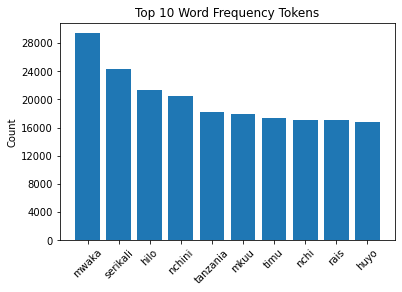

In [27]:
from matplotlib.ticker import MaxNLocator
def visualize_top_10(freq_dist, title):

    # Extract data for plotting
    top_10 = list(zip(*freq_dist.most_common(10)))
    tokens = top_10[0]
    counts = top_10[1]

    # Set up plot and plot data
    fig, ax = plt.subplots()
    ax.bar(tokens, counts)

    # Customize plot appearance
    ax.set_title(title)
    ax.set_ylabel("Count")
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis="x", rotation=45)
    
visualize_top_10(freq_dist, "Top 10 Word Frequency Tokens")


Here we plotted the results to have a more visual view of the tokens

In [31]:
#lets check the Frequency of words in the label column
df['label'].value_counts()

kitaifa      10155
michezo       5970
burudani      2185
kimataifa     1858
uchumi        1259
afya           779
Name: label, dtype: int64

 - 'kitaifa' is the most frequent value in the 'label' column, appearing 10,155 times.
 - 'afya' is the least frequent value, appearing 779 times.

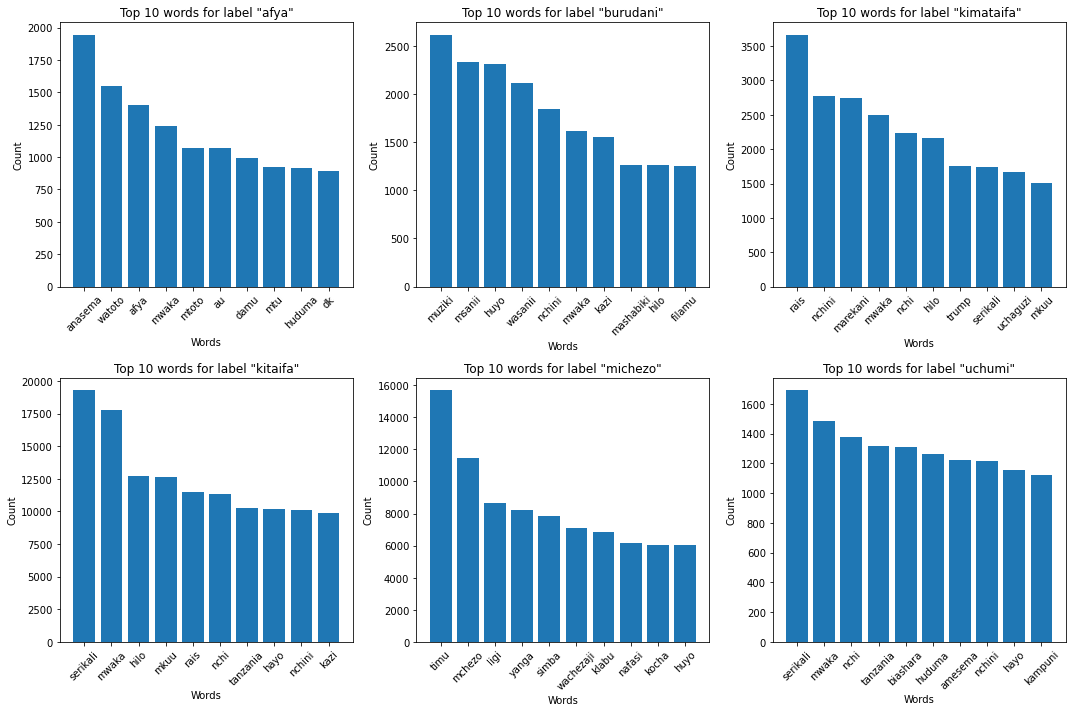

In [29]:
def plot_top_10_for_each_label(df, tokenized_column):
    # Group the data by labels
    grouped_data = df.groupby('label')[tokenized_column]
    # Create a figure with subplots for each label
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
    # Iterate over the labels and plot the top 10 words by count
    for i, (label, tokens) in enumerate(grouped_data):
        # Flatten the list of strings
        flattened_tokens = [token for sublist in tokens for token in sublist]
        # Count the occurrences of each word
        word_counts = pd.Series(flattened_tokens).value_counts()
        top_10_words = word_counts.head(10)
        # Create a bar plot for the current label
        ax = axes[i // 3, i % 3]
        ax.bar(top_10_words.index, top_10_words.values)
        ax.set_title(f'Top 10 words for label "{label}"')
        ax.set_xlabel('Words')
        ax.set_ylabel('Count')
        ax.tick_params(axis='x', rotation=45)
    # Adjust the spacing between subplots
    plt.tight_layout()
    # Show the plots
    plt.show()
    
    
plot_top_10_for_each_label(df, 'tokenized_text')



Here we plotted the top frequent words per label:
- 'anasema' was the top value for the label 'afya'
- 'muziki' was the top value for the label 'burudani'
- 'rais' was the top value for the label 'kimataifa'
- 'serikali' was the top value for the label 'kitaifa'
- 'timu' was the top value for the label 'michezo'
- 'serikali' was the top value for the label 'uchumi'